In [2]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
password = getpass.getpass()

········


2. Read the data into a Pandas dataframe.

In [3]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''
        select a.film_id, r.rental_id, r.rental_date, r.return_date
        , a.language_id, a.rental_duration, a.rental_rate, a.replacement_cost, a.rating, d.amount
        from sakila.film as a join sakila.inventory as b on a.film_id=b.film_id
        join sakila.rental as r on b.inventory_id = r.inventory_id
        join sakila.payment as d on r.rental_id = d.rental_id;
        '''

df = pd.read_sql_query(query, engine)
df

,film_id,rental_id,rental_date,return_date,language_id,rental_duration,rental_rate,replacement_cost,rating,amount
0,1,4863,2005-07-08 19:03:15,2005-07-11 21:29:15,1,6,0.99,20.99,PG,0.99
1,1,11433,2005-08-02 20:13:10,2005-08-11 21:35:10,1,6,0.99,20.99,PG,3.99
2,1,14714,2005-08-21 21:27:43,2005-08-30 22:26:43,1,6,0.99,20.99,PG,3.99
3,1,972,2005-05-30 20:21:07,2005-06-06 00:36:07,1,6,0.99,20.99,PG,1.99
4,1,2117,2005-06-17 20:24:00,2005-06-23 17:45:00,1,6,0.99,20.99,PG,0.99
...,...,...,...,...,...,...,...,...,...,...
16039,1000,711,2005-05-29 03:49:03,2005-05-31 08:29:03,1,3,4.99,18.99,NC-17,4.99
16040,1000,1493,2005-06-15 21:50:32,2005-06-17 01:02:32,1,3,4.99,18.99,NC-17,4.99
16041,1000,6712,2005-07-12 13:24:47,2005-07-20 09:35:47,1,3,4.99,18.99,NC-17,9.99
16042,1000,9701,2005-07-31 07:32:21,2005-08-01 05:07:21,1,3,4.99,18.99,NC-17,4.99


3. Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.

In [4]:
df.set_index('rental_id')

,film_id,rental_date,return_date,language_id,rental_duration,rental_rate,replacement_cost,rating,amount
rental_id,,,,,,,,,
4863,1,2005-07-08 19:03:15,2005-07-11 21:29:15,1,6,0.99,20.99,PG,0.99
11433,1,2005-08-02 20:13:10,2005-08-11 21:35:10,1,6,0.99,20.99,PG,3.99
14714,1,2005-08-21 21:27:43,2005-08-30 22:26:43,1,6,0.99,20.99,PG,3.99
972,1,2005-05-30 20:21:07,2005-06-06 00:36:07,1,6,0.99,20.99,PG,1.99
2117,1,2005-06-17 20:24:00,2005-06-23 17:45:00,1,6,0.99,20.99,PG,0.99
...,...,...,...,...,...,...,...,...,...
711,1000,2005-05-29 03:49:03,2005-05-31 08:29:03,1,3,4.99,18.99,NC-17,4.99
1493,1000,2005-06-15 21:50:32,2005-06-17 01:02:32,1,3,4.99,18.99,NC-17,4.99
6712,1000,2005-07-12 13:24:47,2005-07-20 09:35:47,1,3,4.99,18.99,NC-17,9.99


In [5]:
df.shape

(16044, 10)

In [6]:
df.dtypes

film_id                      int64
rental_id                    int64
rental_date         datetime64[ns]
return_date         datetime64[ns]
language_id                  int64
rental_duration              int64
rental_rate                float64
replacement_cost           float64
rating                      object
amount                     float64
dtype: object

In [7]:
df.describe().round(2)

,film_id,rental_id,language_id,rental_duration,rental_rate,replacement_cost,amount
count,16044.00,16044.00,16044.0,16044.00,16044.00,16044.00,16044.00
mean,501.11,8025.37,1.0,4.94,2.94,20.22,4.20
std,288.51,4632.78,0.0,1.40,1.65,6.08,2.36
min,1.00,1.00,1.0,3.00,0.99,9.99,0.00
25%,255.00,4013.75,1.0,4.00,0.99,14.99,2.99
50%,496.00,8025.50,1.0,5.00,2.99,20.99,3.99
75%,753.00,12037.25,1.0,6.00,4.99,25.99,4.99
max,1000.00,16049.00,1.0,7.00,4.99,29.99,11.99


/Users/Pablofuster/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


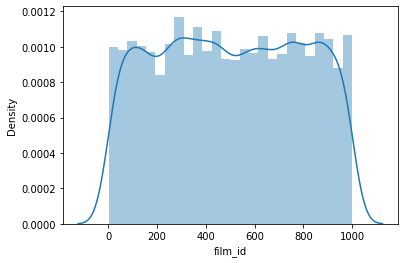

/Users/Pablofuster/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


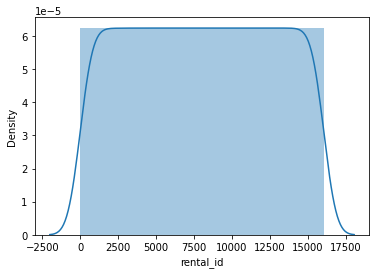

/Users/Pablofuster/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Pablofuster/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


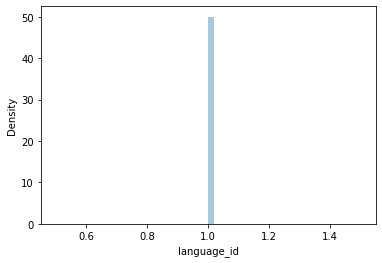

/Users/Pablofuster/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


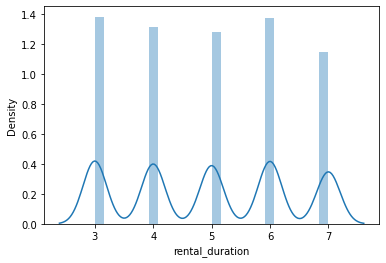

/Users/Pablofuster/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


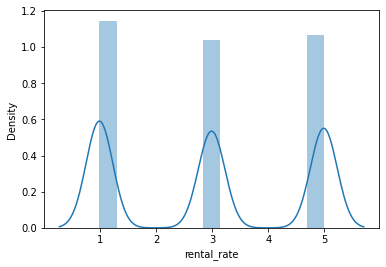

/Users/Pablofuster/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


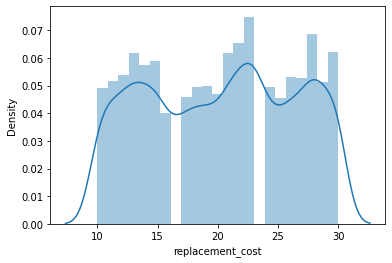

/Users/Pablofuster/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


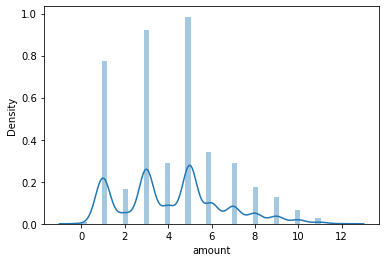

In [8]:
for column in df.select_dtypes(np.number).columns:
    sns.distplot(df[column]) # using Seaborn
    plt.show()